<a href="https://colab.research.google.com/github/KimJisanER/CDK5_inhibitors/blob/main/CDK5_inhibitor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 필요한 라이브러리 Import 및 다운로드

In [25]:
!pip install -q condacolab
import condacolab
condacolab.install()

import sys
sys.path

import condacolab
condacolab.check()

!mamba install -c conda-forge rdkit==2021.03.5

✨🍰✨ Everything looks OK!
✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.25.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['rdkit==2021.03.5']

[+] 0.0s
[+] 0.1s
conda-for

In [3]:
import rdkit
import rdkit.Chem as Chem

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

## 2. Data Processing

>## **IC50** 
The **half maximal inhibitory concentration (IC50)** is a measure of the potency of a substance in inhibiting a specific biological or biochemical function.  
IC50 is a quantitative measure that indicates **how much of a particular inhibitory substance (e.g. drug) is needed to inhibit, in vitro, a given biological process or biological component by 50%.** 
The biological component could be an enzyme, cell, cell receptor or microorganism. IC50 values are typically expressed as molar concentration.   
**In general, the IC50 value of a typical drug is around several nM.**  
```
  pIC50 = -log_10(IC50)
```

###2-1. CSV 파일로부터 데이터 추출
- Pandas DataFrame을 이용하여 CSV 파일을 읽음
- Pandas DataFrame 참고 자료 (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
- ChEMBL에서 가져온 JAK2에 대한 Ligand 들의 SMILES code와 pIC50 값 (pChEMBL Value)을 읽어들임

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
CDK5_dataframe = pd.read_csv('/content/drive/MyDrive/CDK5_INH_P/CDK5_inhibit.csv')
print(CDK5_dataframe)

     Molecule ChEMBL ID Molecule Name  Molecule Max Phase  Molecular Weight  \
0           CHEMBL80644           NaN                   0            225.25   
1          CHEMBL476236           NaN                   0            268.70   
2          CHEMBL236102           NaN                   0            606.54   
3          CHEMBL253769   INDIRUBIN 1                   0            388.21   
4          CHEMBL368112           NaN                   0            386.16   
...                 ...           ...                 ...               ...   
2289      CHEMBL4851634           NaN                   0            371.83   
2290      CHEMBL4875029           NaN                   0            353.84   
2291      CHEMBL3545083    RGB-286638                   1            545.64   
2292      CHEMBL4875986           NaN                   0            380.45   
2293      CHEMBL3655762           NaN                   0            397.53   

     #RO5 Violations AlogP                        C

In [10]:
CDK5_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule ChEMBL ID          2294 non-null   object 
 1   Molecule Name               201 non-null    object 
 2   Molecule Max Phase          2294 non-null   int64  
 3   Molecular Weight            2294 non-null   float64
 4   #RO5 Violations             2294 non-null   object 
 5   AlogP                       2294 non-null   object 
 6   Compound Key                2294 non-null   object 
 7   Smiles                      2294 non-null   object 
 8   Standard Type               2294 non-null   object 
 9   Standard Relation           2249 non-null   object 
 10  Standard Value              2253 non-null   float64
 11  Standard Units              2262 non-null   object 
 12  pChEMBL Value               1393 non-null   float64
 13  Data Validity Comment       35 no

In [14]:
CDK5_dataframe['Standard Type'].value_counts()

IC50    1393
Name: Standard Type, dtype: int64

In [11]:
CDK5_dataframe=CDK5_dataframe.dropna(subset=['pChEMBL Value'], axis=0)

In [12]:
CDK5_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 2293
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule ChEMBL ID          1393 non-null   object 
 1   Molecule Name               166 non-null    object 
 2   Molecule Max Phase          1393 non-null   int64  
 3   Molecular Weight            1393 non-null   float64
 4   #RO5 Violations             1393 non-null   object 
 5   AlogP                       1393 non-null   object 
 6   Compound Key                1393 non-null   object 
 7   Smiles                      1393 non-null   object 
 8   Standard Type               1393 non-null   object 
 9   Standard Relation           1393 non-null   object 
 10  Standard Value              1393 non-null   float64
 11  Standard Units              1393 non-null   object 
 12  pChEMBL Value               1393 non-null   float64
 13  Data Validity Comment       0 non

#### Input 값은 Smiles, Target value 값은 pChEMBL Value로 저장




In [13]:
smiles = CDK5_dataframe['Smiles']
pic50 = CDK5_dataframe['pChEMBL Value']
print(smiles)
print(pic50)

0                          COc1cccc(-c2cc3[nH]ccnc-3n2)c1
2       CC(=O)Nc1cc(-c2ccccc2)c(-c2nnc3n2N=C(c2cc(F)c(...
3       CC(=O)O/N=C1C(=C2/C(=O)Nc3cc(Cl)c(Cl)cc32)/Nc2...
6       CN1CCN(c2ccc3[nH]c(=O)c(-c4csc(-c5ccncc5)n4)c(...
7           O=C1Nc2cc(CN3CCOCC3)ccc2CN1c1csc(-c2ccncc2)n1
                              ...                        
2283         Nc1ncc(-c2cccc3ncsc23)cc1-c1ccc2c(c1)CCNC2=O
2286       CN1C/C=C/CCOc2cccc(c2)-c2ccnc(n2)Nc2cccc(c2)C1
2287    CN1CC=C(c2c(O)cc(O)c3c(=O)cc(-c4ccc(Sc5nc6cccc...
2291    COCCN1CCN(Cc2ccc(-c3n[nH]c4c3C(=O)c3c(NC(=O)NN...
2293    CC[C@H](Nc1nc(NCc2cnc(C)cc2C)c2ncn(C(C)C)c2n1)...
Name: Smiles, Length: 1393, dtype: object
0       5.00
2       5.84
3       7.00
6       6.92
7       7.21
        ... 
2283    4.70
2286    8.40
2287    5.96
2291    8.70
2293    7.64
Name: pChEMBL Value, Length: 1393, dtype: float64


### 2-2. Ligand Featurization

- SMILES 형태로 나타낸 분자를 fingerprint 형태로 featurization

In [26]:
from rdkit.Chem import AllChem
from rdkit import Chem

X = []
for i in smiles:
    mol = Chem.MolFromSmiles(i)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=2048)
    fp = np.array(fp)
    X.append(fp)


In [27]:
X[1]

array([0, 0, 0, ..., 0, 0, 0])

###2-3. 전체 데이터셋을 Training set, Validation set, Test set 으로 나눔
- Training set: Prediction model을 학습하기 위한 data
- Validation set: Prediction model이 제대로 학습이 진행중인지 확인하는 data
- Test set: Prediction model의 성능을 확인하는 data

In [28]:
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, pic50, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.1, random_state=42)

## 3. Deep Learning Model 만들기

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM

###3-1. 데이터 값들을 Tensor로 변환

In [30]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

### 3-2. Deep Learning Model을 Sequential 모델로 정의 
- 아래와 같은 순서로 Layer가  model 정의
1. Dense layer 
2. Dropout layer
3. Dense layer
4. Dropout layer
5. Dense layer

In [31]:
dl_model = Sequential([
                    tf.keras.layers.Dense(64, activation='relu', name="A"),
                    tf.keras.layers.Dropout(0.1),
                    tf.keras.layers.Dense(32, activation='relu', name="B"),
                    tf.keras.layers.Dropout(0.1),
                    tf.keras.layers.Dense(1, name="C"),
])

### 3-3. Model Compile
- Adam Optimizer를 Optimizer로 사용
- Loss Function은 Mean Sequared error function
- Monitoring 할 metric은 mean squared error

- Tensorflow 홈페이지 참조(https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [32]:
mse = tf.keras.losses.MeanSquaredError()
mmse = tf.keras.metrics.MeanSquaredError()

dl_model.compile(optimizer = 'adam',
                 loss = mse,
                 metrics = mmse)

###3-4.  Early Stopping 설정


>## **Early Stopping**
> -  너무 많은 epoch는 overfitting을 일으키고 너무 적은 epoch는 underfitting을 일으킴
-  일반적으로 validation set에서 성능이 더이상 증가하지 않을 때 학습을 중지
-  patience = 10 -> validation set에서 10 epoch가 지나도 성능이 증가하지 않으면 학습을 중지

- training 데이터를 사용하여 100 epoch까지 Early stopping 을 활용하여 모델 학습
- batch size는 32


In [33]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = dl_model.fit(
    x=X_train,
    y=y_train,
    epochs=100,
    batch_size=32,
    callbacks=[callback],               # early stopping
    validation_data=(X_val, y_val)      # X_val, y_val을 validation set으로 사용
)
dl_model.summary()

Epoch 1/100
36/36 [==============================] - 2s 12ms/step - loss: 10.8852 - mean_squared_error: 10.8852 - val_loss: 1.8427 - val_mean_squared_error: 1.8427
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 1.5700 - mean_squared_error: 1.5700 - val_loss: 0.9524 - val_mean_squared_error: 0.9524
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 1.0911 - mean_squared_error: 1.0911 - val_loss: 0.8288 - val_mean_squared_error: 0.8288
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.9053 - mean_squared_error: 0.9053 - val_loss: 0.7037 - val_mean_squared_error: 0.7037
Epoch 5/100
36/36 [==============================] - 0s 7ms/step - loss: 0.8635 - mean_squared_error: 0.8635 - val_loss: 0.6682 - val_mean_squared_error: 0.6682
Epoch 6/100
36/36 [==============================] - 0s 7ms/step - loss: 0.7437 - mean_squared_error: 0.7437 - val_loss: 0.7077 - val_mean_squared_error: 0.7077
Epoch 7/100
36/36 [============

## 4. Deep Learning Model Evaluation

#### 만들어진 Deep Learning 모델의 성능 평가
##### X_test 값을 활용하여 dl_model에서 pIC값을 예측

In [34]:
y_pred = dl_model.predict(X_test)

In [35]:
print(y_pred)

[[5.269097 ]
 [5.499747 ]
 [7.419907 ]
 [6.5173516]
 [7.1595607]
 [5.244125 ]
 [7.103307 ]
 [5.418574 ]
 [6.386334 ]
 [5.16367  ]
 [5.860749 ]
 [5.4417176]
 [4.868556 ]
 [5.43442  ]
 [4.414072 ]
 [5.427796 ]
 [3.2389371]
 [6.956425 ]
 [5.140056 ]
 [6.8901687]
 [5.3980594]
 [6.052631 ]
 [6.3936934]
 [6.3158383]
 [6.531045 ]
 [6.0756226]
 [6.29547  ]
 [4.4031053]
 [6.14349  ]
 [5.669646 ]
 [5.4338126]
 [5.058348 ]
 [5.437098 ]
 [6.660259 ]
 [6.347927 ]
 [8.018322 ]
 [5.524172 ]
 [6.64401  ]
 [5.2940755]
 [6.6725907]
 [7.2559094]
 [5.0462165]
 [6.7657022]
 [6.091542 ]
 [7.1685596]
 [7.0576572]
 [6.276951 ]
 [5.411794 ]
 [6.190454 ]
 [6.1360927]
 [5.358198 ]
 [7.7285285]
 [7.6263347]
 [5.90159  ]
 [6.3367357]
 [5.4519553]
 [7.026522 ]
 [5.0983243]
 [6.1945686]
 [6.3635163]
 [7.1591377]
 [6.402552 ]
 [6.051993 ]
 [7.4504237]
 [4.3352733]
 [6.956817 ]
 [5.731461 ]
 [6.099837 ]
 [5.4241934]
 [5.684195 ]
 [6.649623 ]
 [4.8994994]
 [5.8758187]
 [6.091542 ]
 [5.4715204]
 [6.7748723]
 [5.0763974]

#### Mean squared error를 통해 정량적으로 성능을 측정

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,y_test)
print(mse)

0.6682499834633747


#### Epoch에 따른 training loss와 validation loss를 visualization

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


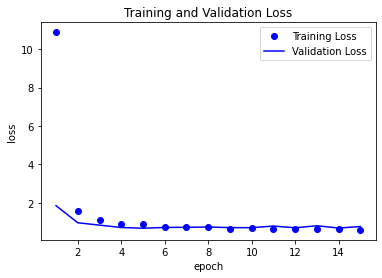

In [37]:
history_dict = history.history
print(history_dict.keys())

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epoch = range(1, len(loss)+1)

plt.plot(epoch, loss, 'bo', label='Training Loss')
plt.plot(epoch, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

### Scatter Plot을 이용하여 예측이 잘 되었는지 확인


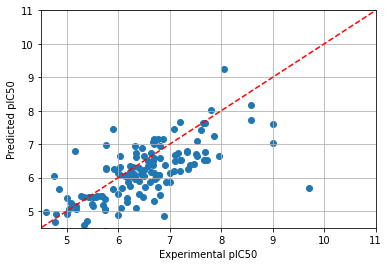

In [38]:
plt.scatter(y_test, y_pred)
plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')

plt.grid()
plt.xlim(4.5, 11)
plt.ylim(4.5, 11)
plt.plot(range(4, 12), range(4, 12), "r--", label="y=x")
plt.show()

## 5. Virtual Screening

##### Zinc15 database의 Compound Library로부터 새로운 candidate를 찾기
##### Compound Library를 csv파일로부터 불러들임

In [41]:
compound_lib =pd.read_csv('/content/drive/MyDrive/CDK5_INH_P/kinase-substances.csv')
print(compound_lib)

                zinc_id                                             smiles
0      ZINC000023247639  CCN1CCN(Cc2ccc(NC(=O)Nc3ccc(Oc4cc(NC)ncn4)cc3)...
1      ZINC000003964325  CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...
2      ZINC000004793192                    CCN1/C(=C/C(C)=O)Sc2ccc(OC)cc21
3      ZINC000018825344  Cc1[nH]c(/C=C2\C(=O)Nc3ccc(F)cc32)c(C)c1C(=O)N...
4      ZINC000211266712    COc1cccc(C(=O)Nc2nc3cc4c(cc3[nH]2)OC(F)(F)O4)c1
...                 ...                                                ...
78309  ZINC000040935360                     Nc1[nH]nc2ccc(-c3cc[nH]n3)cc12
78310  ZINC000299856072  COc1cccc(NC(=O)c2cnc(N3CCN(c4ccccc4OC)CC3)c([N...
78311  ZINC000103271379  O=C1NC(=O)C(c2c[nH]c3ccccc23)=C1Nc1ccc(OCCNc2c...
78312  ZINC000003874496        O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O
78313  ZINC000084654286  CSc1ccccc1Nc1nc(N2CCN(C3CCNCC3)CC2)nc2c(NCC3CC...

[78314 rows x 2 columns]


#### Input 값은 SMILES

In [42]:
comp_smiles = compound_lib['smiles']

#### Compound SMILES로부터 분자 읽어들이기

In [44]:
X_comp = []
for i in comp_smiles:
    mol = Chem.MolFromSmiles(i)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=2048),
    fp = np.array(fp)
    X_comp.append(fp)

#### 개발한 QSAR regression model (Deep learning model :dl_model)을 Compound Library에 적용

In [45]:
# # 데이터를 tensor로 변환 후
X_comp = tf.convert_to_tensor(X_comp)

In [46]:
# dl_model을 통해 예측값을 구함
comp_predict = dl_model.predict(X_comp)

#### 예측값을 compound library 데이터프레임에 새로운 column으로 입력

In [47]:
compound_lib

,zinc_id,smiles
0,ZINC000023247639,CCN1CCN(Cc2ccc(NC(=O)Nc3ccc(Oc4cc(NC)ncn4)cc3)...
1,ZINC000003964325,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...
2,ZINC000004793192,CCN1/C(=C/C(C)=O)Sc2ccc(OC)cc21
3,ZINC000018825344,Cc1[nH]c(/C=C2\C(=O)Nc3ccc(F)cc32)c(C)c1C(=O)N...
4,ZINC000211266712,COc1cccc(C(=O)Nc2nc3cc4c(cc3[nH]2)OC(F)(F)O4)c1
...,...,...
78309,ZINC000040935360,Nc1[nH]nc2ccc(-c3cc[nH]n3)cc12
78310,ZINC000299856072,COc1cccc(NC(=O)c2cnc(N3CCN(c4ccccc4OC)CC3)c([N...
78311,ZINC000103271379,O=C1NC(=O)C(c2c[nH]c3ccccc23)=C1Nc1ccc(OCCNc2c...
78312,ZINC000003874496,O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O


In [48]:
comp_predict

array([[[6.042213 ]],

       [[6.2349877]],

       [[2.8143477]],

       ...,

       [[7.207413 ]],

       [[4.193977 ]],

       [[6.706017 ]]], dtype=float32)

In [49]:
comp_predict=comp_predict.reshape(78314,-1)

In [50]:
compound_lib['predicted_pIC50'] = comp_predict

In [51]:
print(compound_lib)

                zinc_id                                             smiles  \
0      ZINC000023247639  CCN1CCN(Cc2ccc(NC(=O)Nc3ccc(Oc4cc(NC)ncn4)cc3)...   
1      ZINC000003964325  CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...   
2      ZINC000004793192                    CCN1/C(=C/C(C)=O)Sc2ccc(OC)cc21   
3      ZINC000018825344  Cc1[nH]c(/C=C2\C(=O)Nc3ccc(F)cc32)c(C)c1C(=O)N...   
4      ZINC000211266712    COc1cccc(C(=O)Nc2nc3cc4c(cc3[nH]2)OC(F)(F)O4)c1   
...                 ...                                                ...   
78309  ZINC000040935360                     Nc1[nH]nc2ccc(-c3cc[nH]n3)cc12   
78310  ZINC000299856072  COc1cccc(NC(=O)c2cnc(N3CCN(c4ccccc4OC)CC3)c([N...   
78311  ZINC000103271379  O=C1NC(=O)C(c2c[nH]c3ccccc23)=C1Nc1ccc(OCCNc2c...   
78312  ZINC000003874496        O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O   
78313  ZINC000084654286  CSc1ccccc1Nc1nc(N2CCN(C3CCNCC3)CC2)nc2c(NCC3CC...   

       predicted_pIC50  
0             6.042213  
1            

#### 전체 compound library 데이터를 'predicted_pIC50'값으로 내림차순 정렬
- 참고자료: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

In [52]:
sorted_data = compound_lib.sort_values(by=['predicted_pIC50'], ascending=False)
print(sorted_data)

                zinc_id                                             smiles  \
34005  ZINC000049678415  C[C@H](Nc1nccc(-n2cnc3cc(-c4ccnc(N)n4)ccc32)n1...   
1734   ZINC000299854912  Cc1c(NC(=O)c2ccc(C(C)(C)C)cc2)cccc1-c1cn(C)c(=...   
1735   ZINC000299854917  Cc1c(NC(=O)c2ccc(C(C)(C)C)cc2)cccc1-c1cn(C)c(=...   
67663  ZINC000034799979  CS(=O)(=O)CCNC(=O)NCc1cccc(C#Cc2cncnc2Nc2ccc(O...   
65010  ZINC000034799979  CS(=O)(=O)CCNC(=O)NCc1cccc(C#Cc2cncnc2Nc2ccc(O...   
...                 ...                                                ...   
74219  ZINC000001529266                         CCN(CC)C(=S)SSC(=S)N(CC)CC   
30137  ZINC000013125787     O=C1NC(=O)/C(=C/c2ccc(/C=C3/NC(=O)NC3=O)cc2)N1   
70192  ZINC000000010286                    N#CC(C#N)=C(O)c1cc(O)c(O)c(O)c1   
41655  ZINC000008437745                                            NC(N)=S   
41703  ZINC000008437745                                            NC(N)=S   

       predicted_pIC50  
34005        11.546148  
1734         

#### 가장 높은 activity를 보일 것으로 예측된 100개의 후보물질들을 뽑음
- 참고자료: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

In [53]:
candidates = sorted_data.head(100)
print(candidates)

                zinc_id                                             smiles  \
34005  ZINC000049678415  C[C@H](Nc1nccc(-n2cnc3cc(-c4ccnc(N)n4)ccc32)n1...   
1734   ZINC000299854912  Cc1c(NC(=O)c2ccc(C(C)(C)C)cc2)cccc1-c1cn(C)c(=...   
1735   ZINC000299854917  Cc1c(NC(=O)c2ccc(C(C)(C)C)cc2)cccc1-c1cn(C)c(=...   
67663  ZINC000034799979  CS(=O)(=O)CCNC(=O)NCc1cccc(C#Cc2cncnc2Nc2ccc(O...   
65010  ZINC000034799979  CS(=O)(=O)CCNC(=O)NCc1cccc(C#Cc2cncnc2Nc2ccc(O...   
...                 ...                                                ...   
1394   ZINC000143841389  CN1Cc2cc(Nc3ncc4c(=O)n(-c5c(F)cccc5Cl)c5nccn5c...   
13440  ZINC000043206164  CCOC(=O)N1CCCOc2cc(Nc3ncc(Cl)c(Nc4c(F)cccc4C(=...   
66571  ZINC000043206164  CCOC(=O)N1CCCOc2cc(Nc3ncc(Cl)c(Nc4c(F)cccc4C(=...   
63037  ZINC000049784464  Cc1cc(N2CCN(CC(=O)NCCF)CC2)cc2[nH]c(-c3c(NC[C@...   
31069  ZINC000039287486  CCOc1nc(N[C@@H](Cc2ccc3c(c2)COC(C)(C)O3)C(=O)N...   

       predicted_pIC50  
34005        11.546148  
1734         

## 6. Training에 활용된 데이터와 비슷한 Ligand 제거

#### 후보물질들의 SMILES를 구함

In [55]:
cand_smiles = candidates['smiles']
print(cand_smiles)

34005    C[C@H](Nc1nccc(-n2cnc3cc(-c4ccnc(N)n4)ccc32)n1...
1734     Cc1c(NC(=O)c2ccc(C(C)(C)C)cc2)cccc1-c1cn(C)c(=...
1735     Cc1c(NC(=O)c2ccc(C(C)(C)C)cc2)cccc1-c1cn(C)c(=...
67663    CS(=O)(=O)CCNC(=O)NCc1cccc(C#Cc2cncnc2Nc2ccc(O...
65010    CS(=O)(=O)CCNC(=O)NCc1cccc(C#Cc2cncnc2Nc2ccc(O...
                               ...                        
1394     CN1Cc2cc(Nc3ncc4c(=O)n(-c5c(F)cccc5Cl)c5nccn5c...
13440    CCOC(=O)N1CCCOc2cc(Nc3ncc(Cl)c(Nc4c(F)cccc4C(=...
66571    CCOC(=O)N1CCCOc2cc(Nc3ncc(Cl)c(Nc4c(F)cccc4C(=...
63037    Cc1cc(N2CCN(CC(=O)NCCF)CC2)cc2[nH]c(-c3c(NC[C@...
31069    CCOc1nc(N[C@@H](Cc2ccc3c(c2)COC(C)(C)O3)C(=O)N...
Name: smiles, Length: 100, dtype: object


#### 후보물질 및 Training 데이터의 SMILES로부터 ECFP Fingerprint 생성 (as a bit-vector)

In [56]:
# 후보물질들의 SMILES로부터 분자 읽어들이기
zincs = []
for i in cand_smiles:
    mol = Chem.MolFromSmiles(i)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=1024)                                                       # numpy로 변환해서는 안됨
    zincs.append(fp)


# Training에 활용된 데이터의 SMILES로부터 분자 읽어들이기
chembls = []
for i in smiles:
    mol = Chem.MolFromSmiles(i)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=1024)                                                             # numpy로 변환해서는 안됨
    chembls.append(fp)

#### 분자 사이의 유사도 계산

In [57]:
from rdkit import DataStructs
sims = []                                                          # 후보물질의 각 분자 당 유사도의 최고값을 저장
for x in zincs:                                                    # 후보물질들을 하나씩 불러옴 (x)
    max_similarity = -9999
    for y in chembls:                                              # Training 데이터를 하나씩 불러옴 (y)
        similarity = DataStructs.FingerprintSimilarity(x, y)       # 후보물질과 Training 데이터의 Tanimoto 유사도 계산
        if max_similarity < similarity:
            max_similarity = similarity
    sims.append(max_similarity)                                    # 가장 높은 유사도를 저장

####Tanimoto 유사도 최고값을 candidate 데이터프레임에 새로운 column으로 입력

In [58]:
candidates.insert(2, "max_tanimoto_similarity", sims, True)
candidates

,zinc_id,smiles,max_tanimoto_similarity,predicted_pIC50
34005,ZINC000049678415,C[C@H](Nc1nccc(-n2cnc3cc(-c4ccnc(N)n4)ccc32)n1...,0.202830,11.546148
1734,ZINC000299854912,Cc1c(NC(=O)c2ccc(C(C)(C)C)cc2)cccc1-c1cn(C)c(=...,0.175182,11.157328
1735,ZINC000299854917,Cc1c(NC(=O)c2ccc(C(C)(C)C)cc2)cccc1-c1cn(C)c(=...,0.175182,11.157328
67663,ZINC000034799979,CS(=O)(=O)CCNC(=O)NCc1cccc(C#Cc2cncnc2Nc2ccc(O...,0.188235,10.804908
65010,ZINC000034799979,CS(=O)(=O)CCNC(=O)NCc1cccc(C#Cc2cncnc2Nc2ccc(O...,0.188235,10.804908
...,...,...,...,...
1394,ZINC000143841389,CN1Cc2cc(Nc3ncc4c(=O)n(-c5c(F)cccc5Cl)c5nccn5c...,0.195266,9.369492
13440,ZINC000043206164,CCOC(=O)N1CCCOc2cc(Nc3ncc(Cl)c(Nc4c(F)cccc4C(=...,0.207071,9.367558
66571,ZINC000043206164,CCOC(=O)N1CCCOc2cc(Nc3ncc(Cl)c(Nc4c(F)cccc4C(=...,0.207071,9.367558
63037,ZINC000049784464,Cc1cc(N2CCN(CC(=O)NCCF)CC2)cc2[nH]c(-c3c(NC[C@...,0.206349,9.364157


#### Training 데이터 중 Tanimoto 유사도가 0.9 이상인 분자가 있는 후보물질을 제외한 나머지 가운데 10개의 compound를 final candidate로 선정

In [59]:
final_candidates = candidates[candidates.max_tanimoto_similarity<0.9]
final_candidates = final_candidates.head(10)
final_candidates

,zinc_id,smiles,max_tanimoto_similarity,predicted_pIC50
34005,ZINC000049678415,C[C@H](Nc1nccc(-n2cnc3cc(-c4ccnc(N)n4)ccc32)n1...,0.202830,11.546148
1734,ZINC000299854912,Cc1c(NC(=O)c2ccc(C(C)(C)C)cc2)cccc1-c1cn(C)c(=...,0.175182,11.157328
1735,ZINC000299854917,Cc1c(NC(=O)c2ccc(C(C)(C)C)cc2)cccc1-c1cn(C)c(=...,0.175182,11.157328
67663,ZINC000034799979,CS(=O)(=O)CCNC(=O)NCc1cccc(C#Cc2cncnc2Nc2ccc(O...,0.188235,10.804908
65010,ZINC000034799979,CS(=O)(=O)CCNC(=O)NCc1cccc(C#Cc2cncnc2Nc2ccc(O...,0.188235,10.804908
34007,ZINC000095536738,C[C@H](Nc1nccc(-n2cnc3cc(-c4ccncc4)ccc32)n1)[C...,0.197917,10.779299
34030,ZINC000049678968,CCN1CCN(c2ccc3c(c2)ncn3-c2ccnc(N[C@@H](C)[C@@H...,0.198925,10.696426
52625,ZINC000169300428,CC(C)C[C@@H]1NC(=O)CN(CCC(=O)NCCc2c[nH]c3ccccc...,0.175627,10.459738
60406,ZINC000169354415,CC[C@H](C)[C@H](NC(=O)[C@H](CS)NC(C)=O)C(=O)N[...,0.158416,10.402020
22032,ZINC000253908035,COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCCOCCNC(=O)[C...,0.173585,10.381171
